<a href="https://colab.research.google.com/github/GeniusJr001/MachIne_learning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_USA (1).csv to cleaned_data_USA (1).csv


In [3]:
dataset = pd.read_csv('cleaned_data_USA (1).csv')
dataset.head()

,Unnamed: 0,name,main_category,rating,reviews,categories,address,city,country,state,zipcode,broader_category,Weighted_Score,Weighted_Average,All_Cities
0,0,Forsyth Park,Park,4.8,16538.0,"Park, Tourist attraction","Forsyth Park, Savannah, GA 31401",Savannah,USA,GA,NaN,Nature,79382.4,4.67,"Atlanta, Augusta, Chattanooga, Savannah"
1,1,The Cathedral Basilica of St. John the Baptist,Catholic cathedral,4.8,5911.0,"Catholic cathedral, Catholic church, Tourist a...",The Cathedral Basilica of St. John the Baptist...,Savannah,USA,GA,NaN,Religious,28372.8,4.80,"Atlanta, Augusta, Chattanooga, Savannah"
2,2,Fort Pulaski National Monument,Monument,4.8,5221.0,"Monument, Historical place, Historical landmar...","Fort Pulaski National Monument, 101 Fort Pulas...",Savannah,USA,GA,NaN,Cultural,25060.8,4.53,"Atlanta, Augusta, Chattanooga, Savannah"
3,3,Fountain at Forsyth Park,Historical landmark,4.8,4234.0,"Historical landmark, Tourist attraction","Fountain at Forsyth Park, 1 W Gaston St, Savan...",Savannah,USA,GA,NaN,Cultural,20323.2,4.53,"Atlanta, Augusta, Chattanooga, Savannah"
4,4,Wormsloe State Historic Site,Historical place museum,4.5,3615.0,"Historical place museum, Museum, Park, State park","Wormsloe State Historic Site, 7601 Skidaway Rd...",Savannah,USA,GA,NaN,Cultural,16267.5,4.53,"Atlanta, Augusta, Chattanooga, Savannah"


In [4]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


# **PREPROCESSING**

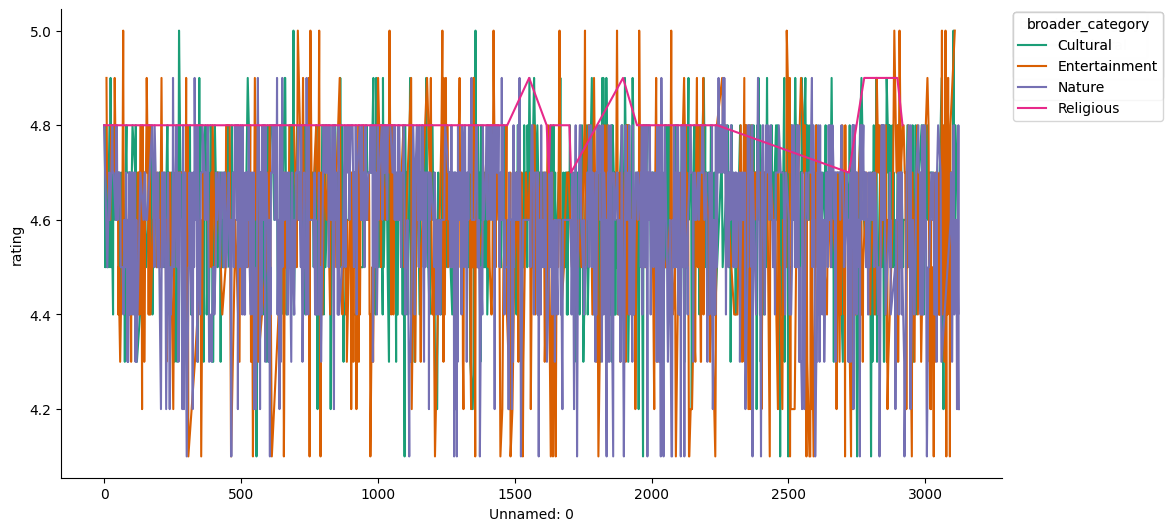

In [5]:
# @title Unnamed vs rating

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('broader_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='broader_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('rating')

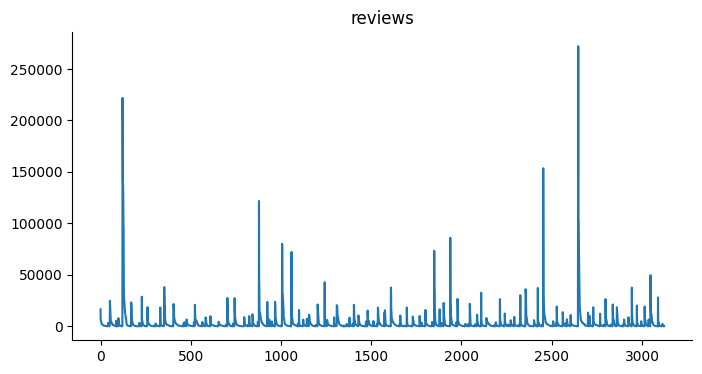

In [6]:
# @title reviews

from matplotlib import pyplot as plt
dataset['reviews'].plot(kind='line', figsize=(8, 4), title='reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
booking_dataset = pd.read_csv('hotel_bookings.csv')
booking_dataset.tail()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-17
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-17
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-17
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-17
119389,119389,City Hotel,0,205,2017,August,35,29,2,7,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-17


In [8]:
# Getting information about the columns in each DataFrame
print(booking_dataset.info())
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [9]:
# Check unique values in `hotel` and `name` columns
unique_hotels = booking_dataset['hotel'].unique()
unique_names = dataset['name'].unique()

# Check the number of unique values in each column
if len(unique_hotels) > 50:
    # If there are too many unique values, sample the top 50
    top_hotels = booking_dataset['hotel'].value_counts().head(50).index.tolist()
    print(f"Top 50 hotels: {top_hotels}")
else:
    # Otherwise, print all unique values
    print(f"All hotels: {unique_hotels}")

if len(unique_names) > 50:
    # If there are too many unique values, sample the top 50
    top_names = dataset['name'].value_counts().head(50).index.tolist()
    print(f"Top 50 names: {top_names}")
else:
    # Otherwise, print all unique values
    print(f"All names: {unique_names}")

All hotels: ['Resort Hotel' 'City Hotel']
Top 50 names: ['Freedom Park', 'Urban Air Trampoline and Adventure Park', "Ripley's Believe It or Not!", 'Riverfront Park', 'Riverside Park', 'Waterfront Park', 'Veterans Park', 'Washington Park', 'Midtown Park', 'Liberty Park', 'Central Park', 'Washington Square', 'Taste It Tours', 'Marshall Park', 'Riverwalk', 'Washington Square Park', 'The Grotto', 'Medieval Torture Museum', 'Hollywood Wax Museum', 'Shakespeare Garden', 'Memorial Park', 'Phoenix Zoo', 'Papago Park', 'Flyover', 'Butterfly Wonderland', 'Paul Bunyan Statue', 'McCormick-Stillman Railroad Park', 'Broadway Pier', 'Highland Park', 'Arizona Boardwalk', 'Arizona Falls', 'Heard Museum', 'Commons Park', 'Veterans Memorial Park', 'Riverview Park', 'Concord Park', 'Centennial Park', 'Founders Park', 'Tampa Riverwalk', 'Stinson Park', "Elvis Presley's Memphis", 'Battery Park', 'Kosciuszko Park', 'Bird Key Park', 'Forest Park', 'The Battery', 'Daytona Lagoon', 'Plains Art Museum', 'Andy Ro

In [11]:
# Check if booking dataset contains tourist destination information
if 'destination' in booking_dataset.columns:
    print("The hotel dataset contains a 'destination' column.")
else:
    print("The hotel dataset does not contain a 'destination' column.")

# Check if booking dataset contains city information
if 'city' in booking_dataset.columns:
    print("The hotel dataset contains a 'city' column.")
else:
    print("The hotel dataset does not contain a 'city' column.")

# Check if tour location dataset contains city and name information
if 'city' in dataset.columns and 'name' in dataset.columns:
    print("The tourism dataset contains both 'city' and 'name' columns.")
else:
    print("The tourism dataset does not contain both 'city' and 'name' columns.")

# If booking dataset does not contain destination information, use df_tourism to map cities to attractions
if 'destination' not in booking_dataset.columns and 'city' in dataset.columns and 'name' in dataset.columns:
    # Create a mapping from cities to attractions
    city_attractions = dataset.groupby('city')['name'].apply(list).to_dict()

    # Print the mapping
    print("Mapping from cities to attractions:", city_attractions)
else:
    print("Cannot create a mapping from cities to attractions.")

The hotel dataset does not contain a 'destination' column.
The hotel dataset does not contain a 'city' column.
The tourism dataset contains both 'city' and 'name' columns.
Mapping from cities to attractions: {'Albany': ['New York State Museum', 'Washington Park', 'Far Shot Albany', 'New York State Capitol', 'Albany Pine Bush Preserve', 'USS SLATER', 'Albany Institute of History & Art', 'Six Mile Waterworks Park', "Huck Finn's Playland", 'Corning Preserve', 'Schuyler Mansion State Historic Site', 'Shaker Heritage Society', 'Tivoli Lake Preserve', 'Ridgefield Park', 'East Capitol Park', 'Crailo State Historic Site', 'Underground Railroad Education Center', 'Ten Broeck Mansion', 'Corning Tower Observation Deck', 'Irish American Heritage Museum', 'Buckingham Lake Park'], 'Anchorage': ['Alaska Zoo', 'Kincaid Park', 'Earthquake Park', 'Delaney Park', 'Anchorage Museum', 'Eagle River Nature Center', 'Cuddy Family Midtown Park', 'Bird Point', 'Alaska Aviation Museum', 'Indian Valley Mine & Gif

In [12]:
import random

# Check if city_attractions is not empty and booking_dataset contains 'hotel' column
if city_attractions and 'hotel' in booking_dataset.columns:
    # Add a new column 'city' to booking_dataset and fill it with a randomly selected city for each row
    booking_dataset['city'] = [random.choice(list(city_attractions.keys())) for _ in range(len(booking_dataset))]

    # Add a new column 'potential_places' to booking dataset and fill it with a list of attractions based on the 'city' column
    booking_dataset['potential_places'] = booking_dataset['city'].apply(lambda city: city_attractions[city])

# Print the potential places
print(booking_dataset['potential_places'])

0         [Longwood, Natchez National Historical Park, M...
1         [Columbus Zoo and Aquarium, Otherworld, Highba...
2         [Paul Bunyan Statue, Broadway Park, Cole Land ...
3         [Zoo Knoxville, World's Fair Park, Market Squa...
4         [Indianapolis Zoo, Soldiers & Sailors Monument...
                                ...                        
119385    [Maymont, Virginia Museum of Fine Arts, The Po...
119386    [New Haven Green, East Rock Park, Yale Univers...
119387    [Caras Park, Greenough Park, Splash Montana, B...
119388    [Zoo Boise, Julia Davis Park, Roaring Springs ...
119389                     [National Trust - Dunham Massey]
Name: potential_places, Length: 119390, dtype: object


In [13]:
# Print the first 5 rows of booking dataset
print(booking_dataset.head().to_markdown(index=False, numalign="left", stralign="left"))

| index   | hotel        | is_canceled   | lead_time   | arrival_date_year   | arrival_date_month   | arrival_date_week_number   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking_changes   | deposit_type   | agent   | company   | days_in_waiting_list   | customer_type   | adr   | required_car_parking_spaces   | total_of_special_requests   | reservation_status   | reservation_status_date   | city         | potential_places                                                                                                                                                                                                                                                                                                              

# **MODEL**

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Check if there is a column with temporal/sequential data
if not any(col.endswith('__date') for col in booking_dataset.columns):
    # Create a new column `arrival_date` by joining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`
    booking_dataset['arrival_date'] = booking_dataset['arrival_date_year'].astype(str) + '-' + booking_dataset['arrival_date_month'] + '-' + booking_dataset['arrival_date_day_of_month'].astype(str)
    booking_dataset['arrival_date'] = pd.to_datetime(booking_dataset['arrival_date'])


# Sort the DataFrame by `arrival_date`
booking = booking_dataset.sort_values(by='arrival_date')

print((booking.head(5)).to_markdown(index=False, numalign="left", stralign="left"))


| index   | hotel        | is_canceled   | lead_time   | arrival_date_year   | arrival_date_month   | arrival_date_week_number   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking_changes   | deposit_type   | agent   | company   | days_in_waiting_list   | customer_type   | adr   | required_car_parking_spaces   | total_of_special_requests   | reservation_status   | reservation_status_date   | city          | potential_places                                                                                                                                                                                                                                                                                                             

In [15]:
# Select the relevant columns
selected_columns = ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                   'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                   'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type',
                   'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type',
                   'required_car_parking_spaces', 'total_of_special_requests', 'city', 'potential_places']

# Convert categorical features to numerical using one-hot encoding
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                       'city']



In [16]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(booking[categorical_columns])

In [17]:
# Scale numerical features
numerical_columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(booking[numerical_columns])

In [24]:
# Combine encoded and scaled features
features = np.concatenate([encoded_features, scaled_features], axis=1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, booking['hotel'], test_size=0.2, random_state=42)

# Reshape the input data to be [samples, time steps, features]
# Here, we assume each sequence has length 1
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [25]:
X_train.shape
X_test.shape

(23878, 1, 356)

In [26]:
# Convert Y_train to numerical data type
Y_train = pd.get_dummies(Y_train, drop_first=True)  # One-hot encoding for 'hotel' column
# Assuming 'hotel' has two unique values, otherwise adjust drop_first or use other encoding methods

# Convert the one-hot encoded DataFrame to a NumPy array
Y_train = Y_train.to_numpy()

# Ensure Y_train is of type float32
Y_train = Y_train.astype(np.float32)


# Do the same for Y_test
Y_test = pd.get_dummies(Y_test, drop_first=True)
Y_test = Y_test.to_numpy()
Y_test = Y_test.astype(np.float32)

In [27]:
# Define the RNN model
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8912 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 2/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6661 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 3/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6658 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 4/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6658 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 5/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6664 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 6/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6657 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 7/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6642 - loss: nan - val_accuracy: 0.6649 - val_loss: nan
Epoch 8/50
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6654 - loss: nan - val_accuracy: 0.6649 - val_loss: nan


In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 65.79%


In [29]:
model.save('recommendation_model.keras')

In [44]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the trained RNN model
# (Assuming you have saved the trained model as 'rnn_model.h5')
model = tf.keras.models.load_model('recommendation_model.keras')

# Function to preprocess user input
def preprocess_input(user_input, encoder, scaler):
    """
    Preprocesses user input for the RNN model.

    Args:
      user_input: A dictionary containing user responses.
      encoder: The trained OneHotEncoder object.
      scaler: The trained MinMaxScaler object.

    Returns:
      A preprocessed numpy array suitable for the RNN model.
    """

    # Extract features from user input
    features = [
        user_input['hotel'],
        user_input['arrival_date_month'],
        user_input['meal'],
        user_input['country'],
        user_input['market_segment'],
        user_input['distribution_channel'],
        user_input['is_repeated_guest'],
        user_input['reserved_room_type'],
        user_input['assigned_room_type'],
        user_input['deposit_type'],
        user_input['customer_type'],
        user_input['city'],  # Include 'city' here as it was in categorical_columns
    ]

    # Convert categorical features to numerical using one-hot encoding
    categorical_features = features
    categorical_features = encoder.transform([categorical_features])


    # Scale numerical features
    numerical_features = [
        user_input['stays_in_weekend_nights'],
        user_input['stays_in_week_nights'],
        user_input['adults'],
        user_input['children'],
        user_input['babies'],
        user_input['previous_cancellations'],
        user_input['previous_bookings_not_canceled'],
        user_input['booking_changes'],
        user_input['days_in_waiting_list'],
        user_input['required_car_parking_spaces'],
        user_input['total_of_special_requests']
    ]

    numerical_features = scaler.transform([numerical_features])

    # Combine encoded and scaled features
    features = np.concatenate([categorical_features, numerical_features], axis=1)

    # Reshape the input data to be [samples, time steps, features]
    features = features.reshape(features.shape[0], 1, features.shape[1])

    return features

# Function to get recommendations
def get_recommendations(user_input, model, df_hotel, encoder, scaler):
    """
    Gets tour location recommendations based on user input.

    Args:
      user_input: A dictionary containing user responses.
      model: The trained RNN model.
      df_hotel: The preprocessed DataFrame.
      encoder: The trained OneHotEncoder object.
      scaler: The trained MinMaxScaler object.

    Returns:
      A list of recommended tour locations.
    """

    # Preprocess user input
    input_features = preprocess_input(user_input, encoder, scaler)

    # Make predictions using the RNN model
    prediction = model.predict(input_features)

    # Get the predicted class (0 or 1)
    predicted_class = (prediction > 0.5).astype(int)

    # Filter hotels based on predicted class
    hotel_type = "Resort Hotel" if predicted_class[0][0] == 1 else "City Hotel"
    filtered_hotels = df_hotel[df_hotel['hotel'] == hotel_type]
    #filtered_hotels = df_hotel[df_hotel['hotel'].astype(int) == predicted_class]

    # Explode 'potential_places' to create separate rows for each potential place
    filtered_hotels = filtered_hotels.explode('potential_places')

    # Rename the column to match the dataset's 'name' column
    filtered_hotels = filtered_hotels.rename(columns={'potential_places': 'name'})

    # Merge with dataset based on individual 'name' values
    filtered_hotels = pd.merge(filtered_hotels, dataset[['name', 'rating']], on='name', how='left')

    # Sort by rating and select top 4 distinct potential places
    top_places = filtered_hotels.sort_values(by=['rating'], ascending=False)['name'].head(4).tolist()

    '''# Get potential places from the filtered hotels
    potential_places = filtered_hotels['potential_places'].values

    filtered_hotels = pd.merge(filtered_hotels, dataset[['name', 'rating']],
                                 left_on='potential_places', right_on='name', how='left')

    # Sort by rating and select top 4
    top_places = filtered_hotels.sort_values(by=['rating'], ascending=False)['potential_places'].head(4).tolist()'''

    return top_places

In [45]:
# Get user input
user_input = {}
user_input['hotel'] = int(input("Enter hotel type (0 for City Hotel, 1 for Resort Hotel): "))
user_input['arrival_date_month'] = input("Enter arrival month (e.g., July): ")
user_input['stays_in_weekend_nights'] = int(input("Enter number of weekend nights: "))
user_input['stays_in_week_nights'] = int(input("Enter number of week nights: "))
user_input['adults'] = int(input("Enter number of adults: "))
user_input['children'] = int(input("Enter number of children: "))
user_input['babies'] = int(input("Enter number of babies: "))
user_input['meal'] = input("Enter meal type (e.g., BB): ")
user_input['country'] = input("Enter country code (e.g., PRT): ")
user_input['market_segment'] = input("Enter market segment (e.g., Direct): ")
user_input['distribution_channel'] = input("Enter distribution channel (e.g., Direct): ")
user_input['is_repeated_guest'] = int(input("Is repeated guest? (0 for No, 1 for Yes): "))
user_input['previous_cancellations'] = int(input("Enter number of previous cancellations: "))
user_input['previous_bookings_not_canceled'] = int(input("Enter number of previous bookings not canceled: "))
user_input['reserved_room_type'] = input("Enter reserved room type (e.g., A): ")
user_input['assigned_room_type'] = input("Enter assigned room type (e.g., A): ")
user_input['booking_changes'] = int(input("Enter number of booking changes: "))
user_input['deposit_type'] = input("Enter deposit type (e.g., No Deposit): ")
user_input['days_in_waiting_list'] = int(input("Enter number of days in waiting list: "))
user_input['customer_type'] = input("Enter customer type (e.g., Transient): ")
user_input['required_car_parking_spaces'] = int(input("Enter number of required car parking spaces: "))
user_input['total_of_special_requests'] = int(input("Enter number of special requests: "))
user_input['city'] = input("Enter city name: ")

# Get recommendations
recommendations = get_recommendations(user_input, model, booking, encoder, scaler)

# Print recommendations
print("Here are some recommended tour locations for you:")
for place in recommendations:
    print(place)

Enter hotel type (0 for City Hotel, 1 for Resort Hotel): 1
Enter arrival month (e.g., July): July
Enter number of weekend nights: 0
Enter number of week nights: 0
Enter number of adults: 2
Enter number of children: 0
Enter number of babies: 0
Enter meal type (e.g., BB): BB
Enter country code (e.g., PRT): PRT
Enter market segment (e.g., Direct): Direct
Enter distribution channel (e.g., Direct): Direct
Is repeated guest? (0 for No, 1 for Yes): 0
Enter number of previous cancellations: 0
Enter number of previous bookings not canceled: 0
Enter reserved room type (e.g., A): C
Enter assigned room type (e.g., A): C
Enter number of booking changes: 0
Enter deposit type (e.g., No Deposit): No Deposit
Enter number of days in waiting list: 0
Enter customer type (e.g., Transient): Transient
Enter number of required car parking spaces: 0
Enter number of special requests: 0
Enter city name: Charlotte


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
Here are some recommended tour locations for you:
Buffalo Double Decker Tours
Biplane Rides Over Atlanta
Rage KC!
Land Cruiser Heritage Museum
